In [26]:
import numpy as np
from scipy.linalg import inv, solve_triangular, lu
import time
import matplotlib.pyplot as plt
import pandas as pd
import itertools

# Spectral decomposition 

1. [Power iteration](#1.-Power-iteration)
2. [Inverse iteration](#2.-Inverse-iteration)
3. [Rayleigh quotient iteration](#3.-Rayleigh-quotient-iteration)
4. [Compare with library functions](#4.-Compare-with-library-functions)
5. [Compare performance](#5.-Compare-performance)

## 1. Power iteration

In [61]:
def power_iteration(A, eps=1e-9):
    v0 = np.identity(A.shape[0])[0] # [1,0,0,...]
    i = 0
    while True:
        i += 1

        v = v0
        v = A @ v
        v /= np.linalg.norm(v)
        if np.linalg.norm(v-v0) < eps:
            return l, v
        l = v.T @ A @ v
        v0 = v

for n in range(2, 5):
    matrix = np.random.rand(n, n)
    matrix = np.matmul(matrix, matrix.T)
    eigenvalue, iterations = power_iteration(matrix)
    eigenvalues, eigenvectors = np.linalg.eig(matrix)
    # show diff 
    print(f"power_method: {eigenvalue}")
    print(f"numpy.linalg.eig: {max(eigenvalues)}")


power_method: 2.4584292314281146
numpy.linalg.eig: 2.458429231428115
power_method: 2.314919601634844
numpy.linalg.eig: 2.3149196016348417
power_method: 3.238747821498589
numpy.linalg.eig: 3.2387478214985914


## 2. Inverse iteration

In [79]:
import scipy

def inverse_iteration(matrix, sigma=8, eps=1e-9):
    vector0 = np.identity(matrix.shape[0])[0]
    B = matrix-sigma*np.identity(matrix.shape[0])
    lupiv = scipy.linalg.lu_factor(B)
    for i in range(10000):
        vector = vector0
        w = scipy.linalg.lu_solve(lupiv, vector)
        vector = w / np.linalg.norm(w)
        if np.linalg.norm(vector-vector0) < eps or np.linalg.norm(vector+vector0) < eps:
            print(i)
            return l, vector
        l = vector.T @ matrix @ vector
        vector0 = vector
    print(i)
    return l, vector

for n in range(2, 5):
    matrix = np.random.rand(n, n)
    matrix = np.matmul(matrix, matrix.T)
    eigenvalue, vector = inverse_iteration(matrix)
    eigenvalues, eigenvectors = np.linalg.eig(matrix)
    # show diff 
    print(f"power_method: {eigenvalue}")
    print(f"numpy.linalg.eig: {max(eigenvalues)}")

117
power_method: 1.2186758960490693
numpy.linalg.eig: 1.2186758960490696
26
power_method: 4.621121534853237
numpy.linalg.eig: 4.621121534853236
42
power_method: 3.221831437076856
numpy.linalg.eig: 3.2218314370768577


## 3. Rayleigh quotient iteration

In [76]:
def rayleigh_quotient_iteration(matrix, sigma, eps=1e-5, max_iter=10000):
    vector = np.ones(matrix.shape[0])
    for i in range(max_iter):
        B = matrix - sigma * np.identity(matrix.shape[0])
        new_vector = scipy.linalg.solve(B, vector)
        new_vector /= np.linalg.norm(new_vector)
        sigma = (new_vector @ matrix @ new_vector.T) / (new_vector @ new_vector.T)
        if np.linalg.norm(new_vector - vector) < eps:
            break
        vector = new_vector
    print(i)
    return sigma, vector / np.linalg.norm(vector)


for n in range(2, 5):
    matrix = np.random.rand(n, n)
    matrix = np.matmul(matrix, matrix.T)
    eigenvalue, vector = rayleigh_quotient_iteration(matrix, 8)
    eigenvalues, eigenvectors = np.linalg.eig(matrix)
    # show diff 
    print(f"power_method: {eigenvalue}")
    print(f"numpy.linalg.eig: {max(eigenvalues)}")

4
power_method: 1.8664932121426538
numpy.linalg.eig: 1.8664932121426538
3
power_method: 2.0768733762846634
numpy.linalg.eig: 2.0768733762846643
2
power_method: 5.408949678977897
numpy.linalg.eig: 5.4089496789779


## 4. Compare with library functions

In [23]:
def compare(func, size=5):
    matrix = np.random.random(size=(size, size))
    matrix = matrix @ matrix.T
    eigval, eigvec = np.linalg.eig(matrix)
    data = []
    for f in func:
        if f in [inverse_iteration, rayleigh_quotient_iteration]:
            for sig in range(5):
                vec, iter = f(matrix, 0)
                data.append([f'{f.__name__} sigma={sig}', iter, np.linalg.norm(abs(vec) - abs(result[1][0]))])
        elif f == np.linalg.eig:
            vec = f(matrix)[0]
            res = float('inf')
            idx = max(range(len(vec)), key=lambda x: abs(vec[x]))

        else:
            vec, iter = f(matrix)
            res = float('inf')
            for r in result[1]:
                res = min(res, np.linalg.norm(abs(vec) - abs(r)))
            data.append([f.__name__, iter, res])
    return pd.DataFrame(data, columns=['Method', 'Iterations', 'Error'])

df = compare([power_iteration, inverse_iteration, rayleigh_quotient_iteration, np.linalg.eig])
df

NameError: name 'result' is not defined

## 5. Compare performance

KeyboardInterrupt: 

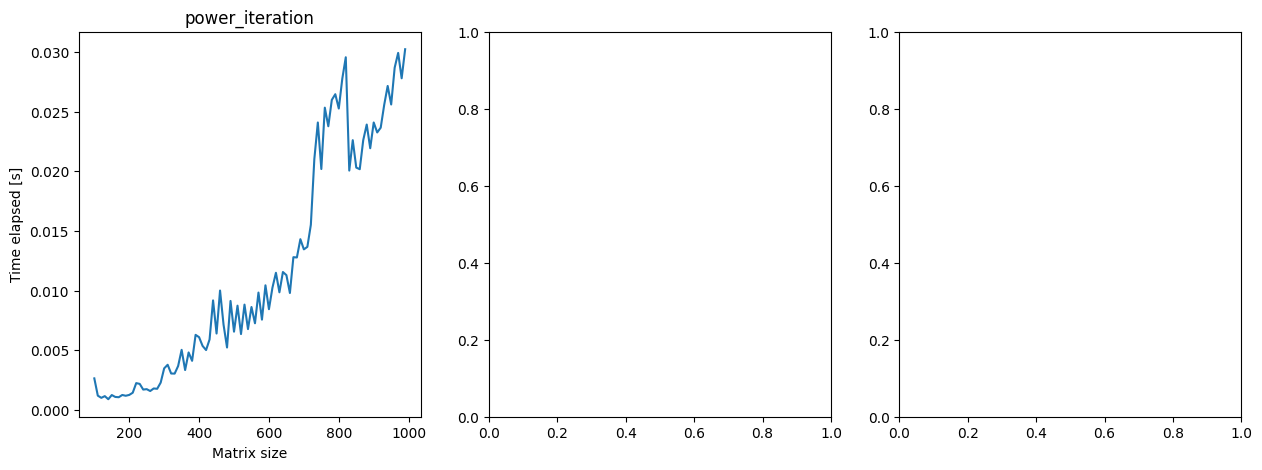

In [ ]:
def plot(func, min=100, max=1000, step=10):
    fig, ax = plt.subplots(1, len(func), figsize=(15, 5))
    for i, f in enumerate(func):
        data = []
        for j in range(min, max, step):
            start = time.perf_counter()
            matrix = 100*np.random.random(size=(j,j))
            matrix = matrix @ matrix.T
            if f in [inverse_iteration, rayleigh_quotient_iteration]:
                f(matrix, sigma=0)
            else:
                f(matrix)
            data.append(time.perf_counter() - start)
        ax[i].plot(range(min, max, step), data)
        ax[i].set_title(f.__name__)
        ax[i].set_xlabel("Matrix size")
        ax[i].set_ylabel("Time elapsed [s]")
    plt.show()

plot([power_iteration, inverse_iteration, rayleigh_quotient_iteration])

---